<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/ViktorB9898-Lab3/Lab3/ViktorB9898_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Approximation**
**Viktor Beck**

# **Abstract**

This report features a method to approximate functions into a finite dimensional subspace.

#**About the code**

In [1]:
"""This program is a lab report in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Viktor Beck (vbeck@kth.se / viktor.beck98@gmail.com)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell.

In [2]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt

# **Introduction**

This report is about approximations, more specifically, about L2 projection to a piecewise linear approximation over a mesh in 1D.

The input for this Lab report was taken from the book of Professor Hoffman (https://doi-org.focus.lib.kth.se/10.1137/1.9781611976724) which corresponds to the content of the course:

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

# **Method**

### **1. Function: L2 projection to pw linear approximation over mesh in 1D**

The input of this function is the function f(x) and the mesh. The L2 projection is given by the following:
\begin{equation}
(P_Nf,v) = (f,v)
\end{equation}
which can be rewritten as
\begin{equation}
\sum_{j=1}^N \alpha_j(\phi_j,\phi_i)=(f,\phi_i).
\end{equation}
This corresponds to a matrix equation. To compute the entries of A and b we need the basis functions $\phi_i$. We will use hat functions as basis functions which are given by $\phi_i=\lambda_{k,j}(x)$ if $x \in I_k$ and 0 otherwise where
\begin{equation}
\lambda_{k,0}(x)=\frac{x_k-x}{h_k}, \quad \lambda_{k,1}(x)=\frac{x-x_{k-1}}{h_k}.
\end{equation}

Now we can calculate the $a_{ij}$. From the lecture notes we know that 
\begin{equation}
a_{ii}=(\phi_i,\phi_i)=\frac{h_i+h_{i+1}}{3},\quad a_{ii+1}=\frac{h_{i+1}}{6},\quad a_{ii-1}=\frac{h_i}{6}
\end{equation}
and
\begin{equation}
b_i = (f(x),\phi_i) = \int f(x)\phi_i(x)dx
\end{equation}
which can be rewritten using the Trapezoidal rule (it could also be calculated directly using a predefined Scipy integration function).

In [3]:
# compute coefficients
def L2_projection_coeff(f, mesh):
    n = len(mesh) - 1
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    for i in range(1, n):
        hi = mesh[i] - mesh[i-1]
        hi1 = mesh[i+1] - mesh[i]
        # apply Trapezoidal rule for b[i] to calculate integral
        b[i] = (hi*f(mesh[i-1]) + hi1*f(mesh[i+1]))/2 + (hi+hi1)*f(mesh[i])/6
        # use A[i,j] from lecture notes
        A[i,i-1] = hi/6
        A[i,i] = (hi+hi1)/3
        A[i,i+1] = hi1/6
    # this prevents A being a singular matrix
    A[0,0] = 1
    A[n,n] = 1
    #print(A)
    alpha = np.linalg.solve(A, b)
    return alpha

# compute approximation to f(x)
def L2_projection(f, x, mesh):
    alpha = L2_projection_coeff(f, mesh)
    n = len(mesh)
    Pf = 0
    for k in range(1,n-1):
        if mesh[k-1] <= x < mesh[k]:
            Pf += alpha[k]*(x-mesh[k-1])/(mesh[k]-mesh[k-1])
        elif mesh[k] <= x < mesh[k+1]:
            Pf += alpha[k]*(mesh[k+1]-x)/(mesh[k+1]-mesh[k])
    return Pf


# **Results**

### **1. Function: L2 projection to pw linear approximation over mesh in 1D**

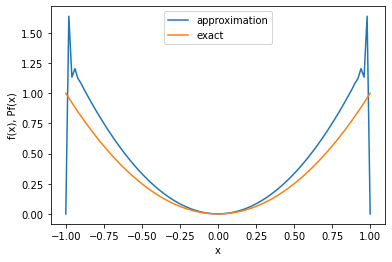

In [4]:
# some arbitrary input
def f(x):
    return x**2


# generate mesh
mesh = np.linspace(-1,1,101)

# evaluate L2 projection of f(x) in the mesh
Pf = np.array([L2_projection(f, x, mesh) for x in mesh])

plt.plot(mesh, Pf, label="approximation")
plt.plot(mesh, f(mesh), label="exact")
plt.xlabel("x")
plt.ylabel("f(x), Pf(x)")
plt.legend()


... one can see that the approximation gets worse at the boundaries. Equally spaced points can lead to clustering of points especially near the boundaries of the interval. A better approximation could be obtained by using Chebychev points. 

Since the approximation is very bad at the boundary but ok elsewhere the overall error norm would not be a good measure of the error. Therefore, the error is computed for each point of the mesh.

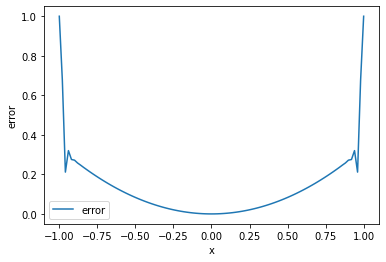

In [5]:
# error
err = [abs(x) for x in (Pf-f(mesh))]

plt.plot(mesh, err, label="error")
plt.xlabel("x")
plt.ylabel("error")
plt.legend()

# **Discussion**

See 'Results'.